In [1]:
%load_ext autoreload
%autoreload 2
import torch
import model
import matplotlib.pylab as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [2]:
print(device)

cuda


Input tensor 
 tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]])
tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000], device='cuda:0')


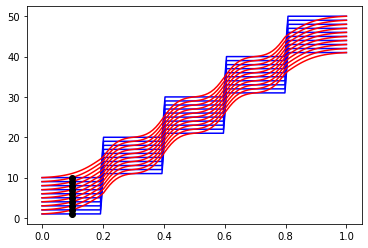

In [9]:
input_tensor = torch.linspace(1,50,50).view(5,10)
v = model.Indexer(input_tensor, cyclic=False).to(device)
print('Input tensor','\n',input_tensor)

x = torch.linspace(0,1,100, device=device)
y_nograd = v(x)
plt.plot(x.cpu(),y_nograd.cpu(), 'b')

x.requires_grad = True
y_grad = v(x)

plt.plot(x.detach().cpu(), y_grad.detach().cpu(), 'r')

x = torch.as_tensor([0.1,]).to(device)
y_grad = v(x)
plt.plot(x.detach().cpu(), y_grad.detach().cpu(), 'ko');


In [11]:
target = input_tensor[3].to(device)

indice = torch.as_tensor(0.1).to(device)
indice.requires_grad=True
v(indice)

optimizer = torch.optim.Adam([indice], lr=0.01)
for iter in range(100):
    optimizer.zero_grad()
    current = v(indice)
    loss = torch.norm(current - target)
    loss.backward()
    optimizer.step()

    if not iter % 20:
        print('{}: indice: {}'.format(iter, indice))
        print("    current: {}".format(v(indice.detach()).cpu().numpy()))
        print('    target: {}'.format(target.cpu().numpy()))


0: indice: 0.10999999940395355
    current: [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
    target: [31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]
20: indice: 0.30706843733787537
    current: [[11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]]
    target: [31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]
40: indice: 0.48025640845298767
    current: [[21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
    target: [31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]
60: indice: 0.6469863057136536
    current: [[31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]]
    target: [31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]
80: indice: 0.7339600920677185
    current: [[31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]]
    target: [31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]


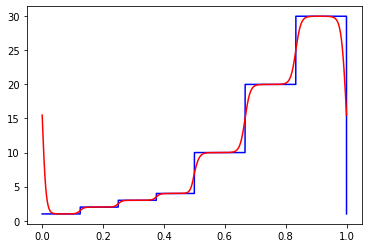

In [14]:

a = torch.as_tensor([1., 2., 3., 4.]).to(device)
b = torch.as_tensor([10, 20., 30.]).to(device)
v = model.Indexer(
    [model.Indexer(a), model.Indexer(b)],
    cyclic=True,
    stiffness=5.
).to(device)
"""
v = model.Indexer(
    [
        model.Indexer([
            model.Indexer([
                model.Indexer(a),
                model.Indexer(b)]),
            model.Indexer(c)
        ]),
        model.Indexer(b)
    ],
    cyclic=True)
"""

x = torch.linspace(0,1,5000, device=device)
y_nograd = v(x)
import matplotlib.pylab as plt
plt.plot(x.cpu(),y_nograd.cpu(), 'b')


#x = torch.as_tensor([0.8533,]).to(device)
x.requires_grad = True
y_grad = 0
n = 1
with torch.no_grad():
    for it in range(n):
        y_grad += v(x)
y_grad /= n
plt.plot(x.detach().cpu(), y_grad.detach().cpu(), 'r')


In [23]:
print(v.indices)
v(v.indices)
v.distance_to_midpoints(0.01)

tensor([0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6667, 0.8333],
       device='cuda:0')
> /home/antoine/repositories/sdn/dev/model.py(204)distance_to_midpoints()
    203         # getting bins boundaries
--> 204         bins = self.indices
    205         bins = torch.cat((bins, torch.ones(1, dtype=bins.dtype, device=bins.device)))



ipdb>  n


> /home/antoine/repositories/sdn/dev/model.py(205)distance_to_midpoints()
    204         bins = self.indices
--> 205         bins = torch.cat((bins, torch.ones(1, dtype=bins.dtype, device=bins.device)))
    206 



ipdb>  n


> /home/antoine/repositories/sdn/dev/model.py(207)distance_to_midpoints()
    206 
--> 207         midpoints = 1/2 * (bins[:-1]+bins[1:])
    208 



ipdb>  bins


tensor([0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6667, 0.8333, 1.0000],
       device='cuda:0')


ipdb>  n


> /home/antoine/repositories/sdn/dev/model.py(209)distance_to_midpoints()
    208 
--> 209         distance = torch.abs(indices[:, None]-midpoints[None,:])
    210         distance = torch.min(distance, dim=1).values



ipdb>  midpoints


tensor([0.0625, 0.1875, 0.3125, 0.4375, 0.5833, 0.7500, 0.9167],
       device='cuda:0')


ipdb>  n


> /home/antoine/repositories/sdn/dev/model.py(210)distance_to_midpoints()
    209         distance = torch.abs(indices[:, None]-midpoints[None,:])
--> 210         distance = torch.min(distance, dim=1).values
    211         return distance



ipdb>  distance


tensor([[0.0525, 0.1775, 0.3025, 0.4275, 0.5733, 0.7400, 0.9067]],
       device='cuda:0')


ipdb>  indices


tensor([0.0100], device='cuda:0')


ipdb>  c


tensor([0.0525], device='cuda:0')

In [30]:
# define target
sequence = torch.as_tensor([1., 1., 2., 3., 4., 4., 4., 4., 4., 10., 20., 20., 30., 1., 1., 2., 3.]).to(device)


deltas = torch.randn((len(sequence))).to(device)
deltas.requires_grad = True
optimizer = torch.optim.Adam([deltas], lr=0.01)

for iter in range(10000):
    optimizer.zero_grad()
    
    indices = torch.cumsum(torch.sigmoid(deltas),dim=0)
    current = v(indices)
    #current = v(deltas)


    loss = torch.norm(current - sequence) + torch.mean(v.distance_to_midpoints(indices))
    loss.backward()
    optimizer.step()
    if not iter % 500:
        print('iteration', iter)
        #print("    current: {}".format(torch.round(v(deltas)).detach().cpu().numpy()))
        print("    current: {}".format(torch.round(v(indices)).detach().cpu().numpy()))
        print('    target: {}'.format(sequence.cpu().numpy()))


iteration 0
    current: [ 4. 26.  3. 20.  3. 11.  2. 20. 10. 28. 13.  2. 20.  3. 27.  4. 30.]
    target: [ 1.  1.  2.  3.  4.  4.  4.  4.  4. 10. 20. 20. 30.  1.  1.  2.  3.]
iteration 500
    current: [ 2.  4.  2.  4.  1.  4.  2.  4. 10. 10. 20.  3. 30.  3.  1.  4.  3.]
    target: [ 1.  1.  2.  3.  4.  4.  4.  4.  4. 10. 20. 20. 30.  1.  1.  2.  3.]
iteration 1000
    current: [ 2.  4.  2.  4.  2.  4.  2.  4.  4. 10. 21. 10. 30.  3.  1.  4.  3.]
    target: [ 1.  1.  2.  3.  4.  4.  4.  4.  4. 10. 20. 20. 30.  1.  1.  2.  3.]
iteration 1500
    current: [ 2.  4.  2.  4.  2.  4.  2.  4.  4. 10. 20. 20. 30.  3.  1.  3.  3.]
    target: [ 1.  1.  2.  3.  4.  4.  4.  4.  4. 10. 20. 20. 30.  1.  1.  2.  3.]
iteration 2000
    current: [ 2.  3.  2.  4.  2.  4.  2.  4.  4. 10. 20. 20. 30.  2.  1.  3.  3.]
    target: [ 1.  1.  2.  3.  4.  4.  4.  4.  4. 10. 20. 20. 30.  1.  1.  2.  3.]
iteration 2500
    current: [ 1.  3.  2.  4.  2.  4.  2.  4.  4. 10. 20. 20. 30.  2.  1.  2.  3.]
    ta

In [32]:
v.distance_to_midpoints(indices)
print(v._prepare_indices(indices))
print(v.)


tensor([0.0616, 0.1798, 0.0399, 0.4350, 0.3102, 0.4492, 0.3134, 0.0265, 0.4369,
        0.0096, 0.7549, 0.7443, 0.9157, 0.0803, 0.0615, 0.1867, 0.0314],
       device='cuda:0', grad_fn=<RemainderBackward0>)

In [359]:
a = 1.
b = 2.
c = 3.
d = 4.

sequence = torch.as_tensor([a, b, c, c, d, a, b, c, d, a, a, b, c, d, a, b, c, d, a, b, c, d]).to(device)


dictionary = torch.rand(4)
dictionary.requires_grad = True

v = model.Indexer(dictionary, cyclic=True, stiffness=3.)
v.to(device)

deltas = torch.rand((len(sequence))).to(device)
deltas.requires_grad = True


optimizer = torch.optim.Adam([deltas]+list(v.parameters()),  lr=0.01)

for iter in range(5000):
    v.stiffness = 0.5 + torch.rand(1)*50
    indices = torch.cumsum(torch.sigmoid(deltas),dim=0)
    current = v(indices)
    #current = v(deltas)
    
    loss = torch.norm(current - sequence)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if not iter % 1000:
        #print("    current: {}".format(torch.round(v(deltas)).detach().cpu().numpy().T))
        print("    current: {}".format(torch.round(v(indices)).detach().cpu().numpy().T))
        print('    target: {}'.format(sequence.cpu().numpy().T))
        print('      DICT:', v.items.detach().cpu().numpy().T)

    current: [1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
    target: [1. 2. 3. 3. 4. 1. 2. 3. 4. 1. 1. 2. 3. 4. 1. 2. 3. 4. 1. 2. 3. 4.]
      DICT: [0.72216403 0.82132244 0.83240587 0.01901878]


KeyboardInterrupt: 

In [284]:
v(indices.detach())

tensor([0.9228, 0.9228, 3.9724, 3.9159, 3.9724, 0.9228, 1.2038, 3.9159, 3.9724,
        1.2038, 0.9228, 1.2038, 3.9159, 3.9159, 1.2038, 0.9228, 3.9724, 3.9159,
        0.9228, 1.2038, 3.9159, 3.9724], device='cuda:0',
       grad_fn=<IndexPutBackward>)

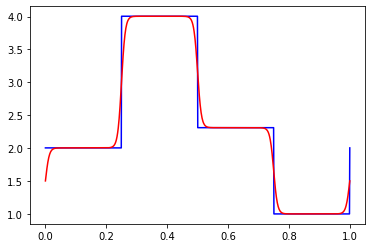

In [352]:
x = torch.linspace(0,1,1000, device=device)
y_nograd = v(x)
import matplotlib.pylab as plt
plt.plot(x.cpu(),y_nograd.detach().cpu(), 'b')


#x = torch.as_tensor([0.8533,]).to(device)
x.requires_grad = True
y_grad = v(x)
plt.plot(x.detach().cpu(), y_grad.detach().cpu(), 'r')


In [353]:
torch.remainder(indices, 1.)

tensor([0.0625, 0.0650, 0.1875, 0.3125, 0.4375, 0.4375, 0.4344, 0.4375, 0.4375,
        0.1895, 0.7500, 0.7500, 0.9167, 0.0625, 0.0664, 0.1875, 0.3125],
       device='cuda:0', grad_fn=<RemainderBackward0>)

In [164]:
v.indices

tensor([0.0000, 0.2500, 0.5000, 0.7500], device='cuda:0')